# PREPROCESSING

# IMPORT LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import unidecode 
import re 
import time 
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords 
from nltk import word_tokenize 
import string 
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings('ignore')

In [2]:
# Read data into a dataframe and check
train_ds = pd.read_json("D:\Data Science CapStone Project\Gift_Cards.json", orient="records", lines=True)

In [4]:
train_ds.head(5)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,1,25,False,"12 19, 2008",APV13CM0919JD,B001GXRQW0,{'Gift Amount:': ' 50'},LEH,"Amazon,\nI am shopping for Amazon.com gift cards for Christmas gifts and am really so disappointed that out of five choices there isn't one that says ""Merry Christmas"" or mentions Christmas at all...",Merry Christmas.,1229644800,NaN
1,5,NaN,False,"12 17, 2008",A3G8U1G1V082SN,B001GXRQW0,{'Gift Amount:': ' 50'},Tali,"I got this gift card from a friend, and it was the best! The site has so much to choose from... great gift.",Gift card with best selection,1229472000,NaN
2,5,4,False,"12 17, 2008",A11T2Q0EVTUWP,B001GXRQW0,{'Gift Amount:': ' 50'},Z,aren't we going to save trees?! :) People who were complaining about paper gift cards can simply buy an electronic gift card via email. It's very convenient and indeed a great gift. I found paper ...,A convenient and great gift for the environment :-),1229472000,NaN
3,5,NaN,False,"12 17, 2008",A9YKGBH3SV22C,B001GXRQW0,{'Gift Amount:': ' 25'},Giotravels,You can always get someone something from Amazon with the safety net that they can return it if they don't like it. But returning things is such a hassle. The card takes care of that--no more retu...,Totally make sense,1229472000,NaN
4,1,NaN,True,"12 17, 2008",A34WZIHVF3OKOL,B001GXRQW0,NaN,King Dad,"Why take 50 dollars of good money with no limitations, and turn it into Amazon money that can only be used at their site? Where is the benefit?\n\nAlso, you spend time and headache buying these ty...",Give CASH!,1229472000,NaN


In [5]:
train_ds.shape

(147194, 12)

In [6]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147194 entries, 0 to 147193
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         147194 non-null  int64 
 1   vote            6341 non-null    object
 2   verified        147194 non-null  bool  
 3   reviewTime      147194 non-null  object
 4   reviewerID      147194 non-null  object
 5   asin            147194 non-null  object
 6   style           42375 non-null   object
 7   reviewerName    147190 non-null  object
 8   reviewText      147035 non-null  object
 9   summary         147154 non-null  object
 10  unixReviewTime  147194 non-null  int64 
 11  image           406 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 12.5+ MB


In [7]:
train_ds.isnull().sum()

overall                0
vote              140853
verified               0
reviewTime             0
reviewerID             0
asin                   0
style             104819
reviewerName           4
reviewText           159
summary               40
unixReviewTime         0
image             146788
dtype: int64

In [8]:
dropping_columns = ['vote','reviewTime','reviewerID','asin','reviewerName','unixReviewTime','image','style','verified','summary']
train_ds = train_ds.drop(dropping_columns,axis = 1)

In [9]:
train_ds = train_ds.dropna()

In [10]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147035 entries, 0 to 147193
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     147035 non-null  int64 
 1   reviewText  147035 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [11]:
# If the rating is greater than 3 = 1 else 0
train_ds["overall"] = train_ds["overall"].apply(lambda x: 1 if x > 3  else 0)
train_ds

,overall,reviewText
0,0,"Amazon,\nI am shopping for Amazon.com gift cards for Christmas gifts and am really so disappointed that out of five choices there isn't one that says ""Merry Christmas"" or mentions Christmas at all..."
1,1,"I got this gift card from a friend, and it was the best! The site has so much to choose from... great gift."
2,1,aren't we going to save trees?! :) People who were complaining about paper gift cards can simply buy an electronic gift card via email. It's very convenient and indeed a great gift. I found paper ...
3,1,You can always get someone something from Amazon with the safety net that they can return it if they don't like it. But returning things is such a hassle. The card takes care of that--no more retu...
4,0,"Why take 50 dollars of good money with no limitations, and turn it into Amazon money that can only be used at their site? Where is the benefit?\n\nAlso, you spend time and headache buying these ty..."
...,...,...
147189,1,"I always enjoy getting these Gift cards via email for Lowe's home improvement ! Simple, Easy , Effective and right on time. :)"
147190,1,Worked great
147191,1,Gift card
147192,1,"What is there to say, It's a gift card."


In [12]:
train_ds.overall.value_counts(normalize=True)

1    0.91972
0    0.08028
Name: overall, dtype: float64

## PREPROCESSING DATA 
1. Remove newlines & Tabs
2. Removal of HTML tags
3. Remove Links
4. Remove Whitespace

In [13]:
def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_newlines_tabs)

In [14]:
def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

train_ds["reviewText"] = train_ds["reviewText"].apply(strip_html_tags)

In [15]:
def remove_links(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    # Remove all the occurrences of text that ends with .com
    remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_com

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_links)

In [16]:
def remove_whitespace(text):
    pattern = re.compile(r'\s+') 
    Without_whitespace = re.sub(pattern, ' ', text)
    # There are some instances where there is no space after '?' & ')', 
    # So I am replacing these with one space so that It will not consider two words as one token.
    text = Without_whitespace.replace('?', ' ? ').replace(')', ') ')
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_whitespace)

In [17]:
gc.collect()

3542

## TEXT PREPROCESSING 
1. Remove Accented Characters
2. Case Conversion
3. Reducing repeated characters and punctuations
4. Expand Contractions
5. Remove Special Characters
6. Remove Stopwords
7. Remove Numbers
8. Correcting Mis-spelled words
9. Lemmatization

In [18]:
def accented_characters_removal(text):
    text = unidecode.unidecode(text)
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(accented_characters_removal)

In [19]:
def lower_casing_text(text):
    text = text.lower()
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(lower_casing_text)

In [20]:
def reducing_incorrect_character_repeatation(text):
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

train_ds["reviewText"] = train_ds["reviewText"].apply(reducing_incorrect_character_repeatation)

## Explanation for using some symbols in above regex expression
**\1** —> is equivalent to re.search(...). group(1). It Refers to first capturing group. \1 matches the exact same text that was matched by the first capturing group.

**{1,}** --> It means we are matching for repeatation that occurs more than one times.

**DOTALL** -> It matches newline character as well unlike dot operator which matches everything in the given text except newline character.

**sub()** --> This function is used to replace occurrences of a particular sub-string with another sub-string. This function takes as input the following: The sub-string to replace. The sub-string to replace with.

**r'\1\1'** --> It limits all the repeatation to two characters.

**r'\1'** --> Limits all the repeatation to only one character.

**{2,}** --> It means to match for repeatation that occurs more than two times

In [21]:
CONTRACTION_MAP = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
def expand_contractions(text, contraction_mapping =  CONTRACTION_MAP):
    # Tokenizing text into tokens.
    list_Of_tokens = text.split(' ')
    # Checking for whether the given token matches with the Key & replacing word with key's value.
    # Check whether Word is in lidt_Of_tokens or not.
    for Word in list_Of_tokens: 
        # Check whether found word is in dictionary "Contraction Map" or not as a key. 
         if Word in CONTRACTION_MAP: 
                # If Word is present in both dictionary & list_Of_tokens, replace that word with the key value.
                list_Of_tokens = [item.replace(Word, CONTRACTION_MAP[Word]) for item in list_Of_tokens]
                
    # Converting list of tokens to String.
    String_Of_tokens = ' '.join(str(e) for e in list_Of_tokens) 
    return String_Of_tokens   

train_ds["reviewText"] = train_ds["reviewText"].apply(expand_contractions)
train_ds

,overall,reviewText
0,0,"amazon, i am shopping for gift cards for christmas gifts and am really so disappointed that out of five choices there is not one that says ""merry christmas"" or mentions christmas at all! i am sure..."
1,1,"i got this gift card from a friend, and it was the best! the site has so much to choose from. great gift."
2,1,are not we going to save trees ? ! :) people who were complaining about paper gift cards can simply buy an electronic gift card via email. it is very convenient and indeed a great gift. i found pa...
3,1,you can always get someone something from amazon with the safety net that they can return it if they do not like it. but returning things is such a hassle. the card takes care of that-no more retu...
4,0,"why take 50 dollars of good money with no limitations, and turn it into amazon money that can only be used at their site ? where is the benefit ? also, you spend time and headache buying these typ..."
...,...,...
147189,1,"i always enjoy getting these gift cards via email for lowe's home improvement ! simple, easy , effective and right on time. :)"
147190,1,worked great
147191,1,gift card
147192,1,"what is there to say, it is a gift card."


In [22]:
def removing_special_characters(text):
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    return text

train_ds["reviewText"] = train_ds["reviewText"].apply(removing_special_characters)

In [23]:
stoplist = stopwords.words('english') 
stoplist = set(stoplist)
def removing_stopwords(text):
    # repr() function actually gives the precise information about the string
    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stoplist ]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)    
    return words_string

train_ds["reviewText"] = train_ds["reviewText"].apply(removing_stopwords)

In [24]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

train_ds["reviewText"] = train_ds["reviewText"].apply(remove_numbers)

In [25]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatization(text):
    # Converting words to their root forms
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    lemma = [word.translate(str.maketrans('', '', string.punctuation)) for word in lemma]
    return lemma

train_ds["reviewText"] = train_ds["reviewText"].apply(lemmatization)
train_ds['reviewText'] = train_ds['reviewText'].apply(lambda x: ' '.join(x))

In [27]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image  

# get the text based on ratings! 
rating_zero = train_ds['reviewText'][train_ds['overall'] == 0]
rating_one = train_ds['reviewText'][train_ds['overall'] == 1]


# word tokenize the data 
def list_tokenizer(rating): 
    ratings = " ".join(rating)
    ratings = nltk.word_tokenize(ratings)
    return str(ratings)

# visualizer 
def word_cloud(rating, number): 
    wc = WordCloud(background_color = 'black', max_font_size = 50, max_words = 100)  
    wc.generate(rating)  
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation = 'bilinear')  
    plt.title(f'WordCloud for {number}')
    plt.axis('off');

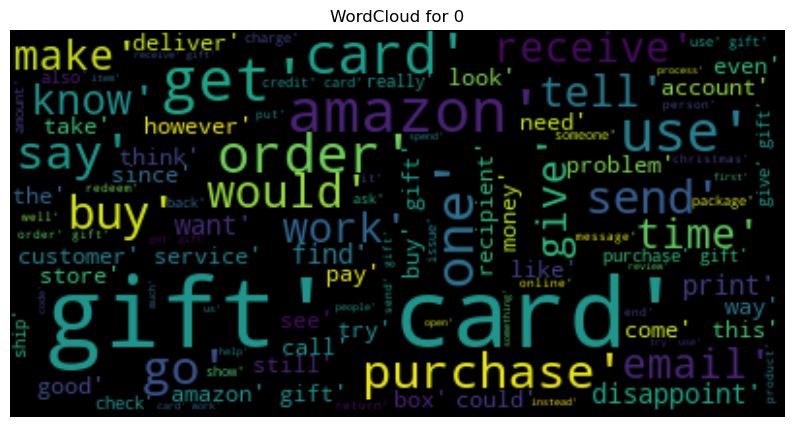

In [28]:
word_cloud(list_tokenizer(rating_zero), 0)

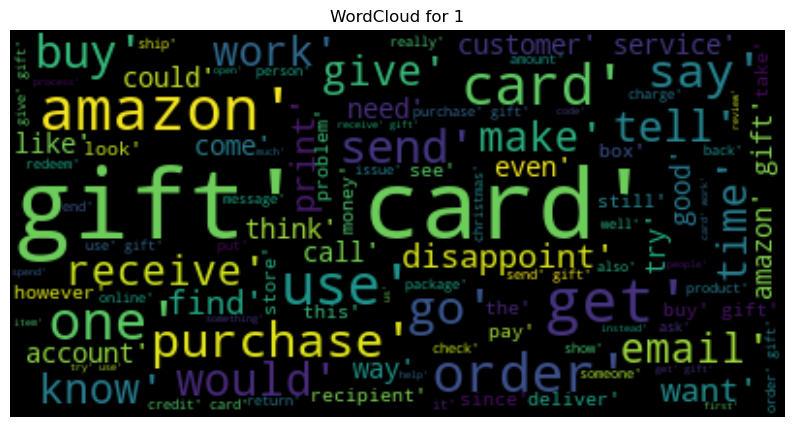

In [29]:
word_cloud(list_tokenizer(rating_zero), 1)

In [30]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# Tokenize the text in each review
tokenized_reviews = train_ds['reviewText'].apply(word_tokenize)

# Concatenate all the tokenized reviews into a single list
all_words = [word for review in tokenized_reviews for word in review]

# Find the frequency distribution of words
fdist = FreqDist(all_words)

# Get the top 50 most frequently occurring words
top_words = fdist.most_common(50)

In [31]:
# Remove common words
train_ds["reviewText"] = train_ds["reviewText"].apply(
    lambda x: ' '.join([word for word in x.split() if word not in top_words]))

In [32]:
train_ds.to_csv("Gift_Cards_Preprocessed_Data.csv",index=False)

In [33]:
train_ds

,overall,reviewText
0,0,amazon shop gift card christmas gift really disappoint five choices one say merry christmas mention christmas sure alone want card reflect actual holiday celebrate principle send amazon gift card ...
1,1,get gift card friend best site much choose great gift
2,1,are go save tree people complain paper gift card simply buy electronic gift card via email convenient indeed great gift find paper gift card annoy since always wonder much money get leave lose los...
3,1,you always get someone something amazon safety net return like return things hassle card take care thatno return hassle
4,0,why take dollars good money limitations turn amazon money use site benefit also spend time headache buy type card deal activation issue risk expiration delivery issue keep keep track much remain c...
...,...,...
147189,1,always enjoy get gift card via email low home improvement simple easy effective right time
147190,1,worked great
147191,1,gift card
147192,1,what say gift card


# MODEL BUILDING

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings('ignore')

# CHECKING DATASET
1. Check for null values if present and not affecting remove the values. 

In [2]:
# Load the dataset
train_ds = pd.read_csv('/kaggle/input/gift-card-preprocessed-data/Gift_Cards_Preprocessed_Data.csv')

In [3]:
train_ds

,overall,reviewText
0,0,amazon shop gift card christmas gift really disappoint five choices one say merry christmas mention christmas sure alone want card reflect actual holiday celebrate principle send amazon gift card ...
1,1,get gift card friend best site much choose great gift
2,1,are go save tree people complain paper gift card simply buy electronic gift card via email convenient indeed great gift find paper gift card annoy since always wonder much money get leave lose los...
3,1,you always get someone something amazon safety net return like return things hassle card take care thatno return hassle
4,0,why take dollars good money limitations turn amazon money use site benefit also spend time headache buy type card deal activation issue risk expiration delivery issue keep keep track much remain c...
...,...,...
147030,1,always enjoy get gift card via email low home improvement simple easy effective right time
147031,1,worked great
147032,1,gift card
147033,1,what say gift card


In [4]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147035 entries, 0 to 147034
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     147035 non-null  int64 
 1   reviewText  146674 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.2+ MB


In [5]:
train_ds = train_ds.dropna()

# TF-IDF VECTORIZER
1. Selecting maxfeatures as 10000
2. Creating a pickle file of TF-IDF

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
feature_vector = tfidf_vectorizer.fit(train_ds.reviewText)
train_ds_features = tfidf_vectorizer.transform(train_ds.reviewText)
features = feature_vector.get_feature_names_out()
print("Total number of features: ", len(features))

Total number of features:  27462


In [8]:
import pickle
with open('tf_idf_obj.pkl', 'wb') as file:
    pickle.dump({
        'tf_idf_obj': tfidf_vectorizer,
        'feature_names': features
    }, file)

# SPLITTING THE DATASET
1. Train and Test Set
2. Test_size: 0.3 , Train Data: 0.7

In [9]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(train_ds_features, train_ds.overall,
                                                test_size = 0.3,
                                                random_state = 42)

# MODELS USED: 
 1. BernoulliNB
 2. Multinomial
 3. LinearSVC
 4. Logistic Regression
 5. Random Forest Classifier

In [10]:
nb_clf = BernoulliNB()
nb_clf.fit(train_X.toarray(), train_y)

BernoulliNB()

In [11]:
test_ds_predicted = nb_clf.predict(test_X.toarray())

In [12]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.49      0.54      0.52      3520
           1       0.96      0.95      0.96     40483

    accuracy                           0.92     44003
   macro avg       0.73      0.75      0.74     44003
weighted avg       0.92      0.92      0.92     44003



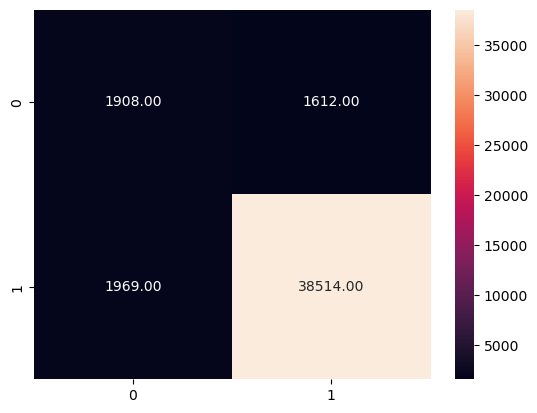

In [13]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

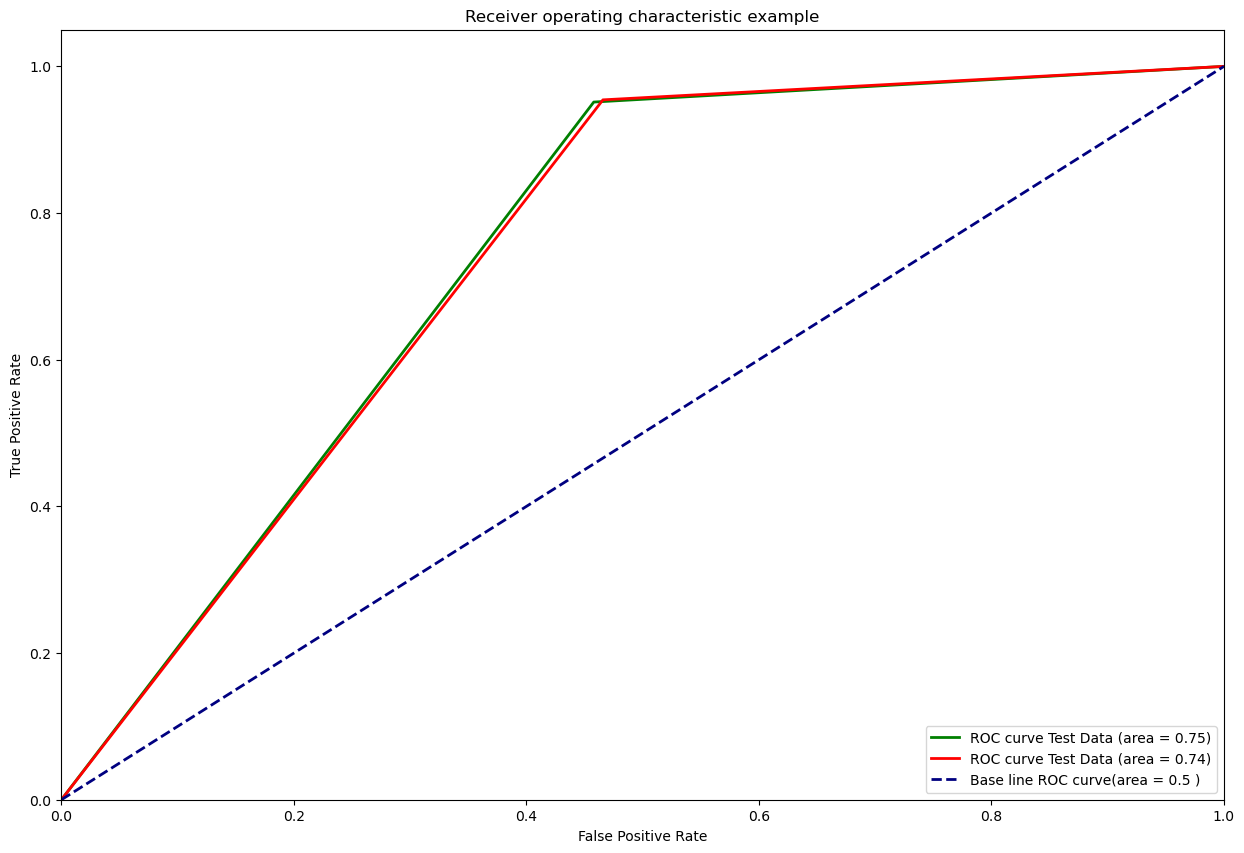

In [14]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(nb_clf,train_X,train_y,test_X,test_y)

In [16]:
mul = MultinomialNB()
mul.fit(train_X.toarray(), train_y)

MultinomialNB()

In [17]:
test_ds_predicted = mul.predict(test_X.toarray())

In [18]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.85      0.17      0.29      3520
           1       0.93      1.00      0.96     40483

    accuracy                           0.93     44003
   macro avg       0.89      0.58      0.62     44003
weighted avg       0.93      0.93      0.91     44003



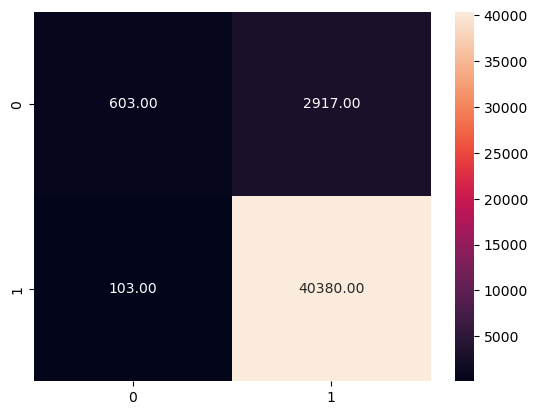

In [19]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

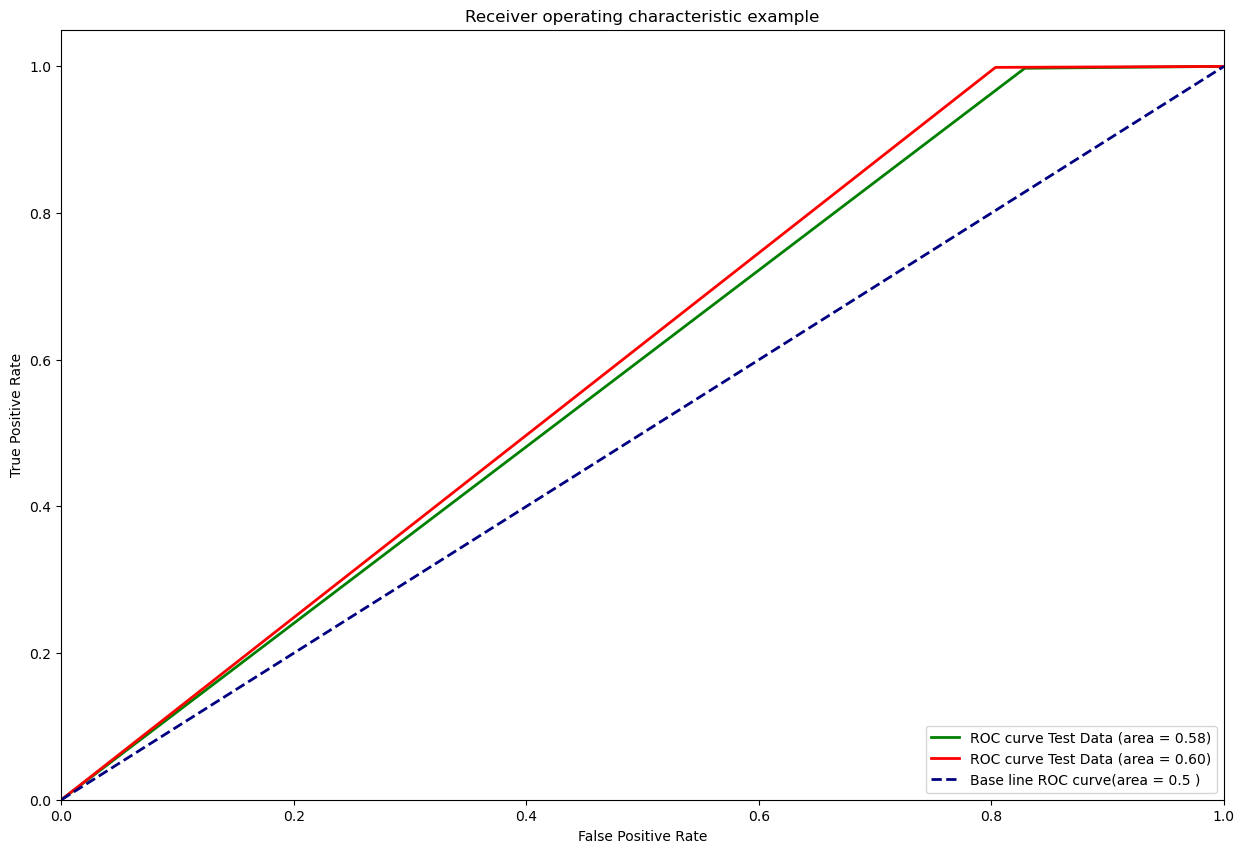

In [20]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(mul,train_X,train_y,test_X,test_y)

In [22]:
log = LogisticRegression()
log.fit(train_X.toarray(), train_y)

LogisticRegression()

In [23]:
test_ds_predicted = log.predict(test_X.toarray())

In [24]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.84      0.54      0.66      3520
           1       0.96      0.99      0.98     40483

    accuracy                           0.96     44003
   macro avg       0.90      0.77      0.82     44003
weighted avg       0.95      0.96      0.95     44003



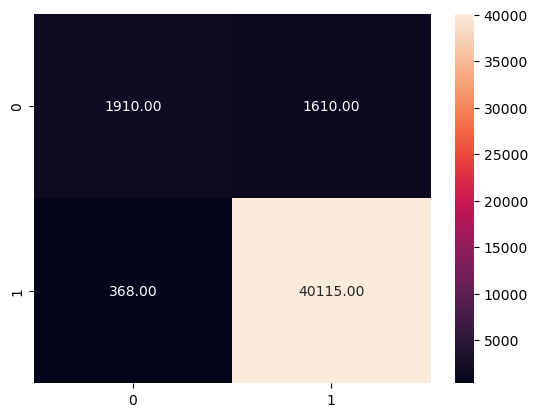

In [25]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

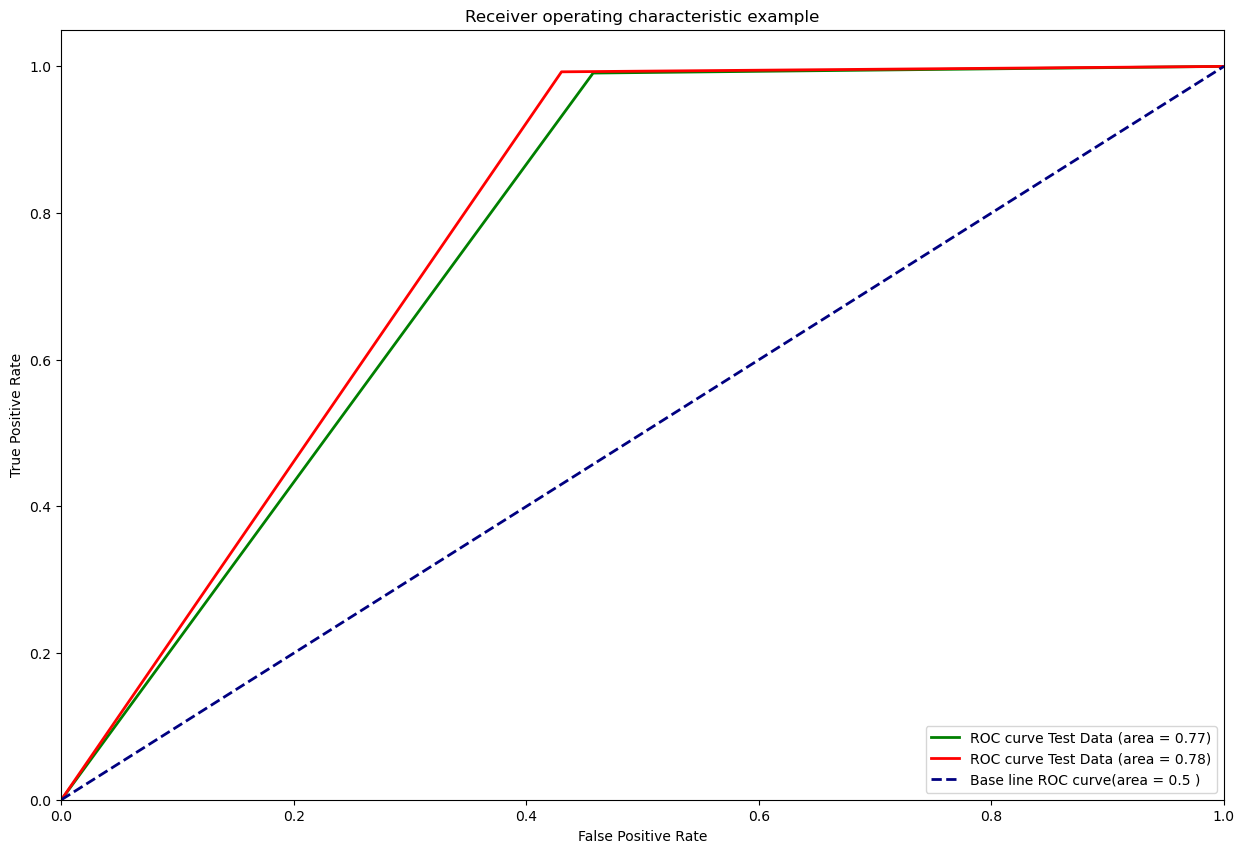

In [26]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(log,train_X,train_y,test_X,test_y)

In [28]:
svc = LinearSVC()
svc.fit(train_X.toarray(), train_y)

LinearSVC()

In [29]:
test_ds_predicted = svc.predict(test_X.toarray())

In [30]:
from sklearn import metrics 

print(metrics.classification_report(test_y, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69      3520
           1       0.97      0.99      0.98     40483

    accuracy                           0.96     44003
   macro avg       0.89      0.79      0.83     44003
weighted avg       0.95      0.96      0.95     44003



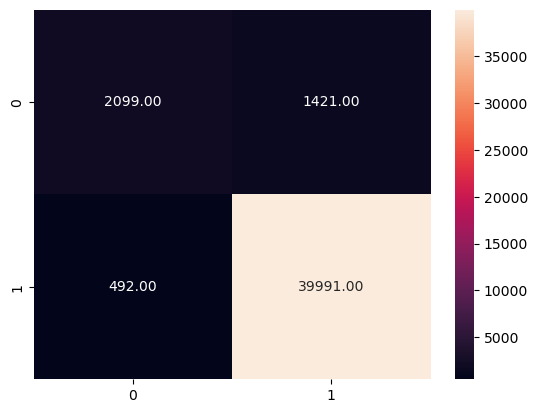

In [31]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

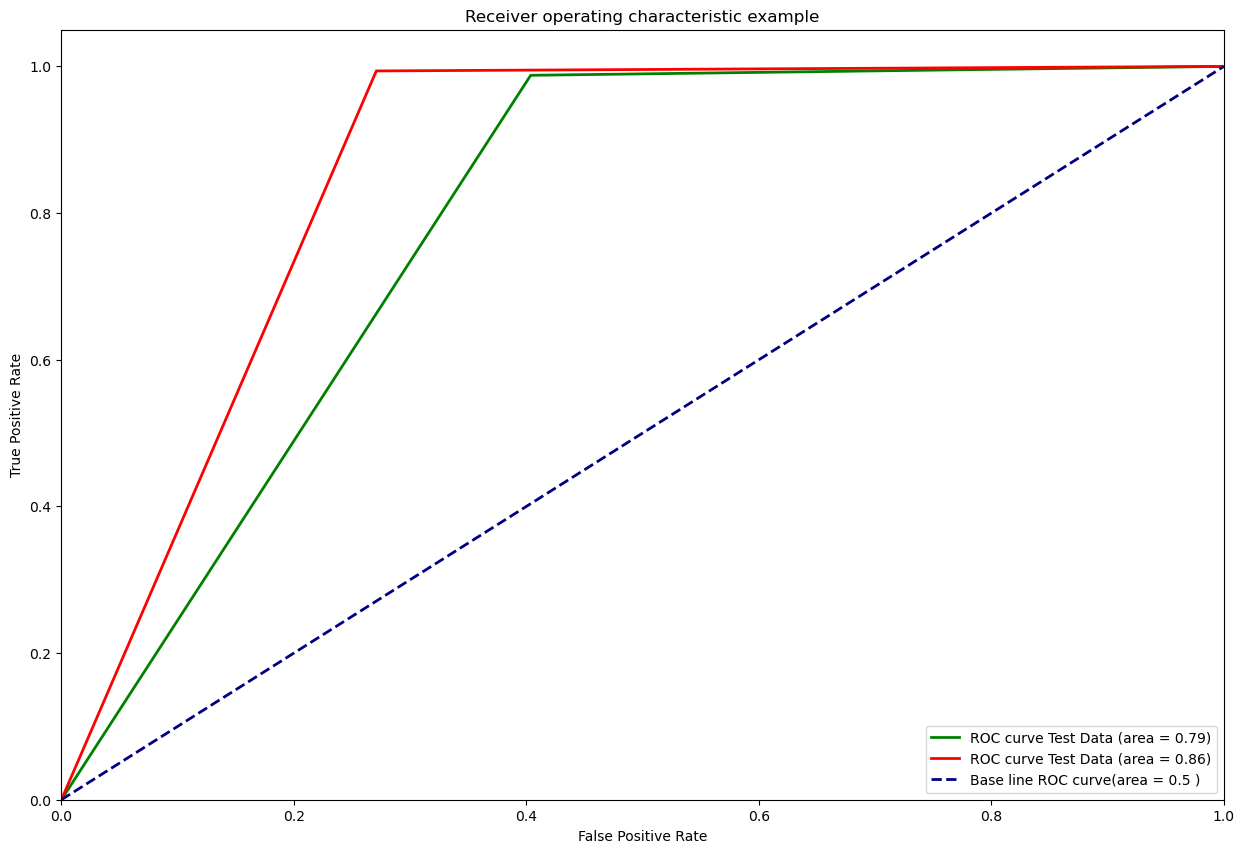

In [32]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(svc,train_X,train_y,test_X,test_y)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rfc.fit(train_X, train_y)

# Predict the target values for the testing set
predicted_y = rfc.predict(test_X)

In [35]:
from sklearn import metrics 

print(metrics.classification_report(test_y, predicted_y))

              precision    recall  f1-score   support

           0       0.89      0.32      0.47      3520
           1       0.94      1.00      0.97     40483

    accuracy                           0.94     44003
   macro avg       0.92      0.66      0.72     44003
weighted avg       0.94      0.94      0.93     44003



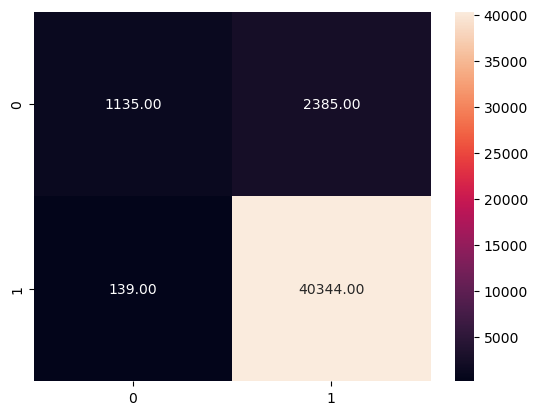

In [36]:
from sklearn import metrics

cm = metrics.confusion_matrix(test_y, predicted_y) 
sn.heatmap(cm, annot=True, fmt='.2f');

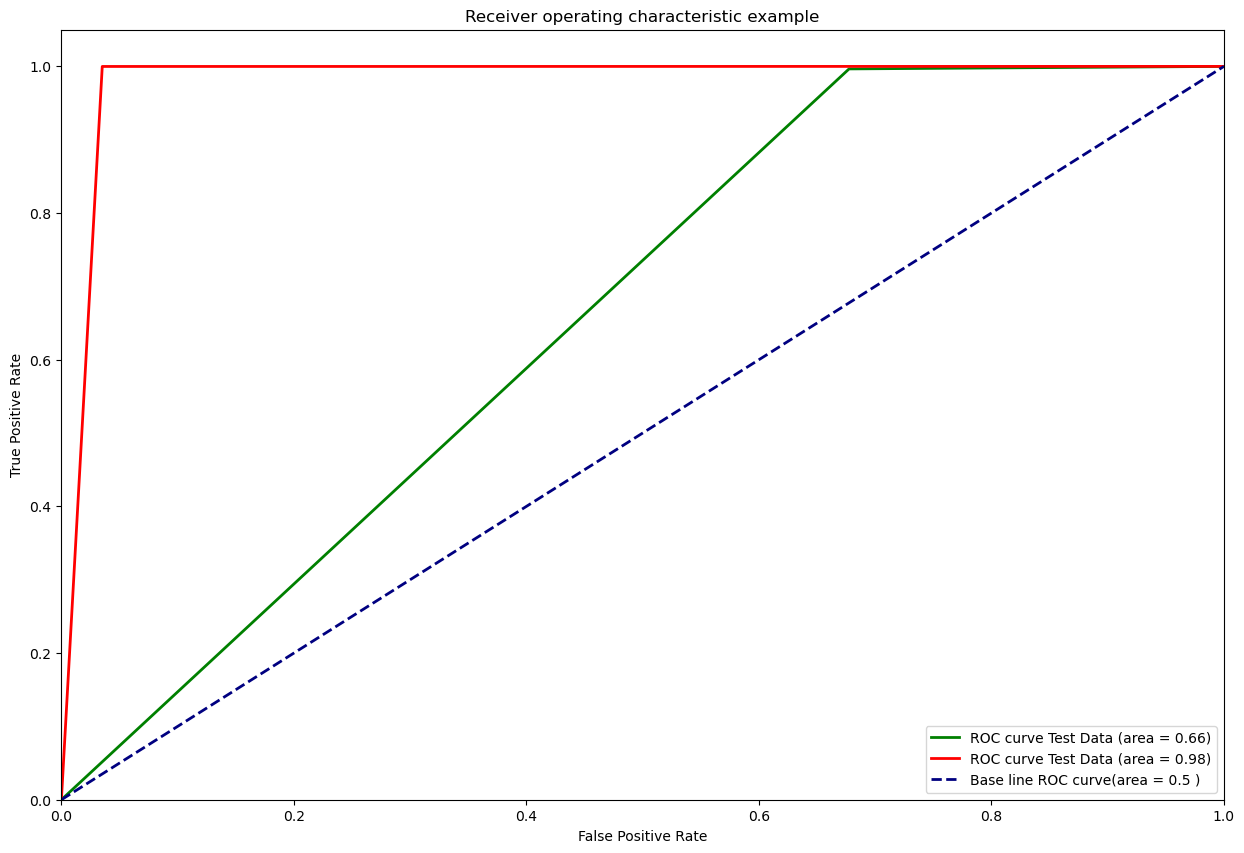

In [37]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,train_X,train_y,test_X,test_y):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(test_X)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(test_y,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(train_X)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(train_y,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(rfc,train_X,train_y,test_X,test_y)

## MAKE PICKLE FILES OF MODEL

In [39]:
import joblib
joblib.dump( nb_clf, "BernoulliNB_Model_Gift.pkl" )
joblib.dump( nb_clf, "MultinomialNB_Model_Gift.pkl" )
joblib.dump( log, "LogisticRegression_Model_Gift.pkl" )
joblib.dump( svc, "LinearSVC_Model_Gift.pkl" )
joblib.dump( rfc, "RandomForestClassifier_Model_Gift.pkl" )

['RandomForestClassifier_Model_Gift.pkl']

## TESTING DATA 
1. : Check null values
2. : Apply TF-IDF on any row of TEST DATA
3. : Apply different models on data

In [40]:
test_ds = pd.read_csv("/kaggle/input/gift-cards-test-data/GiftCards_Preprocessed_TestData.csv")

In [41]:
test_ds

,Rating,ReviewText
0,1,perfect occasion extremely fast delivery thing note though made paper type substance like envelope mailer come also took step make tampering evident everything come wrapped plastic might want take...
1,1,sure review came thank displayed gave money could spend anywhere put spend website good little people use feel like bsing review done
2,0,buy birthday often recipient always excited get one shop want need vast selection product birthday design really cute small enough put birthday special way tell someone happy birthday
3,1,buy love many design many printed sentiment option add personal note variety dollar amount also physical form holiday used bunch prize family friend trivia game really cool prize tip parent best m...
4,1,birthday sister really appreciates lot since enjoys shopping way pick want made giving whole lot easier shipped quickly delivered time give birthday great thought bright happy birthday envelope ca...
...,...,...
1195,1,needed granddaughter could leave house due loved could order store
1196,1,bought know easy
1197,0,really much got day gave birthday
1198,1,balance someone look used


In [45]:
test_ds.isnull().sum()

Rating        0
ReviewText    0
dtype: int64

In [44]:
test_ds = test_ds.dropna()

## Loading pickle file of TF-IDF
1. Apply the tf-idf on any row data selected

In [47]:
import pickle
with open('/kaggle/working/tf_idf_obj.pkl', 'rb') as file:
    data = pickle.load(file)
    tf_idf_obj = data['tf_idf_obj']
    feature_names = data['feature_names']

# Transform the unseen data point using the loaded tf_idf_obj object
# Actual value = 1 
new_text_vectorized_1 = tf_idf_obj.transform([test_ds["ReviewText"][1]])

In [65]:
test_ds["Rating"][215]

0

In [66]:
# Actual value = 0
new_text_vectorized_0 = tf_idf_obj.transform([test_ds["ReviewText"][215]])

## LOAD THE MODELS

In [49]:
import joblib

loaded_model1 = joblib.load("/kaggle/working/BernoulliNB_Model_Gift.pkl")
loaded_model2 = joblib.load("/kaggle/working/MultinomialNB_Model_Gift.pkl")
loaded_model3 = joblib.load("/kaggle/working/LinearSVC_Model_Gift.pkl")
loaded_model4 = joblib.load("/kaggle/working/LogisticRegression_Model_Gift.pkl")
loaded_model5 = joblib.load("/kaggle/working/RandomForestClassifier_Model_Gift.pkl")

## PREDICTION ON DATA

In [50]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
prediction1_1 = loaded_model1.predict(new_text_vectorized_1)
prediction2_1  = loaded_model2.predict(new_text_vectorized_1)
prediction3_1  = loaded_model3.predict(new_text_vectorized_1)
prediction4_1  = loaded_model4.predict(new_text_vectorized_1)
prediction5_1  = loaded_model5.predict(new_text_vectorized_1)

In [67]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
prediction1_0 = loaded_model1.predict(new_text_vectorized_0)
prediction2_0 = loaded_model2.predict(new_text_vectorized_0)
prediction3_0 = loaded_model3.predict(new_text_vectorized_0)
prediction4_0 = loaded_model4.predict(new_text_vectorized_0)
prediction5_0 = loaded_model5.predict(new_text_vectorized_0)

## OUTPUT OF PREDICTION GIVEN BY MODELS

In [52]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
print("Prediction value Bernoulli: ",prediction1_1)
print("Prediction value Multinomial: ",prediction2_1)
print("Prediction value LinearSVC: ",prediction3_1)
print("Prediction value Logistic Regression: ",prediction4_1)
print("Prediction value Random Forest: ",prediction5_1)

Prediction value Bernoulli:  [1]
Prediction value Multinomial:  [1]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [1]


In [68]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
print("Prediction value Bernoulli: ",prediction1_0)
print("Prediction value Multinomial: ",prediction2_0)
print("Prediction value LinearSVC: ",prediction3_0)
print("Prediction value Logistic Regression: ",prediction4_0)
print("Prediction value Random Forest: ",prediction5_0)

Prediction value Bernoulli:  [0]
Prediction value Multinomial:  [0]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [1]


# DOING SAMPLING - SMOTE

In [10]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_smote, y_smote = smote.fit_resample(train_X, train_y)
print ("Distribution of class labels before resampling {}".format(Counter(train_y)))
print ("Distribution of class labels after resampling {}".format(Counter(y_smote)))         

Distribution of class labels before resampling Counter({1: 94391, 0: 8280})
Distribution of class labels after resampling Counter({1: 94391, 0: 94391})


# MODELS USED: 
 1. BernoulliNB
 2. Multinomial
 3. LinearSVC
 4. Logistic Regression
 5. Random Forest Classifier

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(X_smote, y_smote,
                                                test_size = 0.3,
                                                random_state = 42)

In [14]:
nb_clf = BernoulliNB()
nb_clf.fit(X_train.toarray(), Y_train)

BernoulliNB()

In [15]:
test_ds_predicted = nb_clf.predict(X_test.toarray())

In [16]:
from sklearn import metrics 

print(metrics.classification_report(y_test, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     28340
           1       0.76      0.92      0.83     28295

    accuracy                           0.81     56635
   macro avg       0.83      0.81      0.81     56635
weighted avg       0.83      0.81      0.81     56635



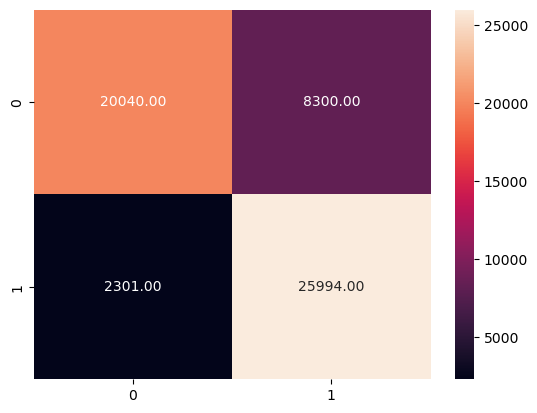

In [17]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

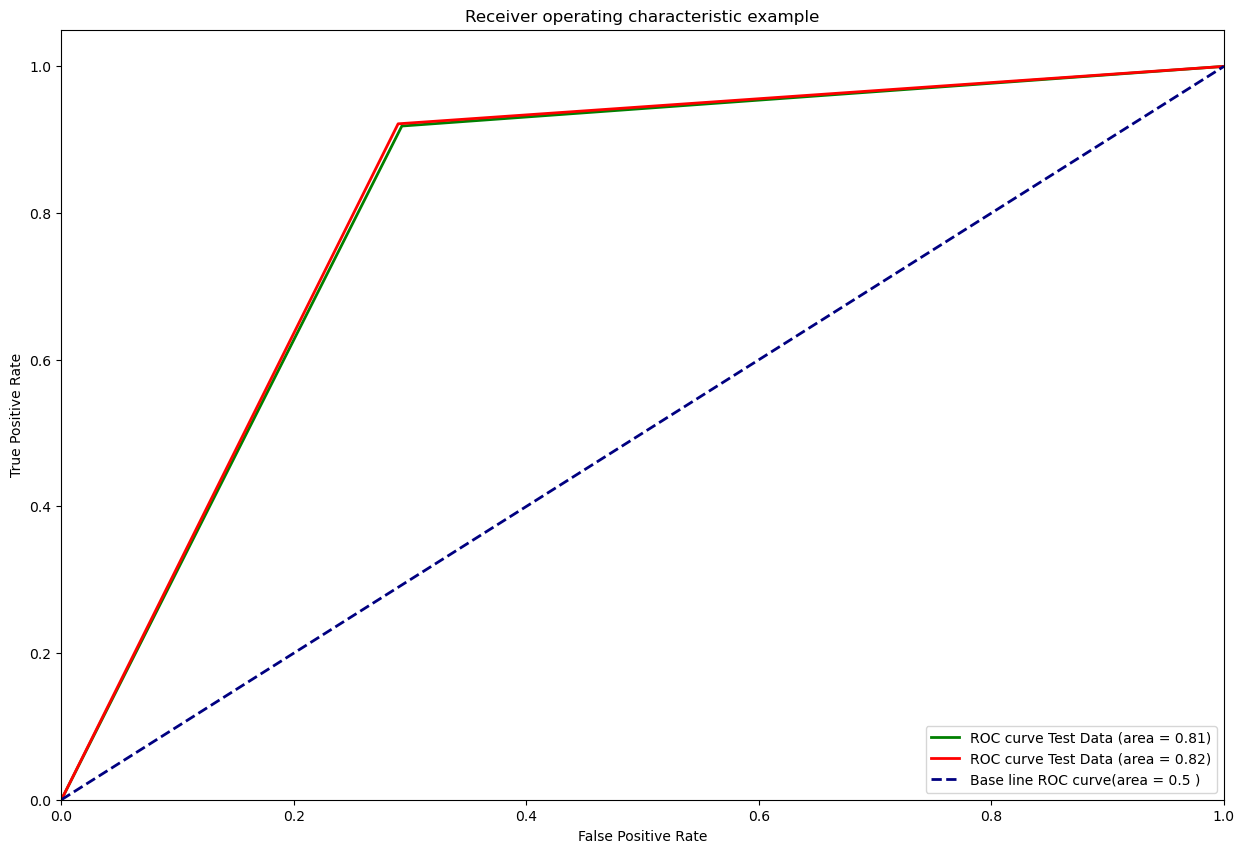

In [18]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,X_train,Y_train,X_test,y_test):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(X_test)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(y_test,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(X_train)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(Y_train,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(nb_clf,X_train,Y_train,X_test,y_test)

In [19]:
mul = MultinomialNB()
mul.fit(X_train.toarray(), Y_train)

MultinomialNB()

In [20]:
test_ds_predicted = mul.predict(X_test.toarray())

In [21]:
from sklearn import metrics 

print(metrics.classification_report(y_test, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     28340
           1       0.89      0.89      0.89     28295

    accuracy                           0.89     56635
   macro avg       0.89      0.89      0.89     56635
weighted avg       0.89      0.89      0.89     56635



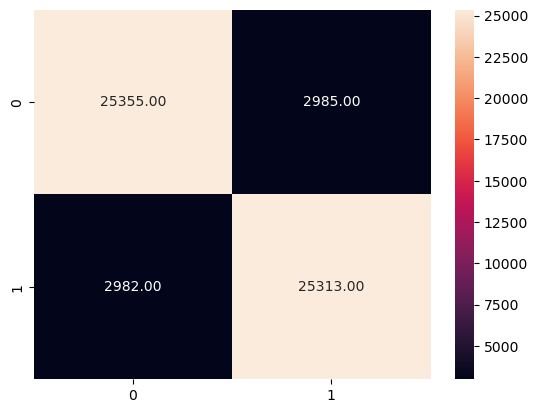

In [22]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

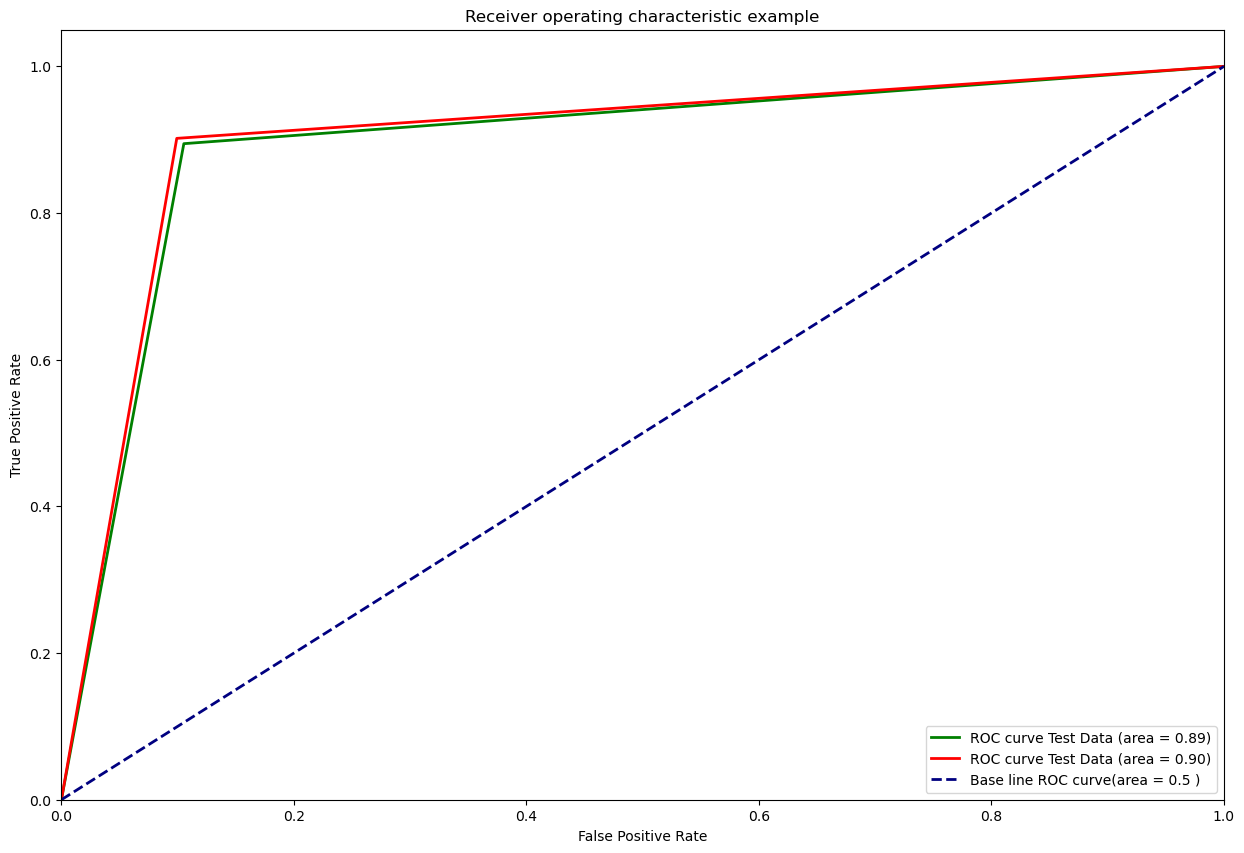

In [23]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,X_train,Y_train,X_test,y_test):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(X_test)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(y_test,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(X_train)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(Y_train,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(mul,X_train,Y_train,X_test,y_test)

In [24]:
log = LogisticRegression()
log.fit(X_train.toarray(), Y_train)

LogisticRegression()

In [25]:
test_ds_predicted = log.predict(X_test.toarray())

In [26]:
from sklearn import metrics 

print(metrics.classification_report(y_test, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     28340
           1       0.93      0.91      0.92     28295

    accuracy                           0.92     56635
   macro avg       0.92      0.92      0.92     56635
weighted avg       0.92      0.92      0.92     56635



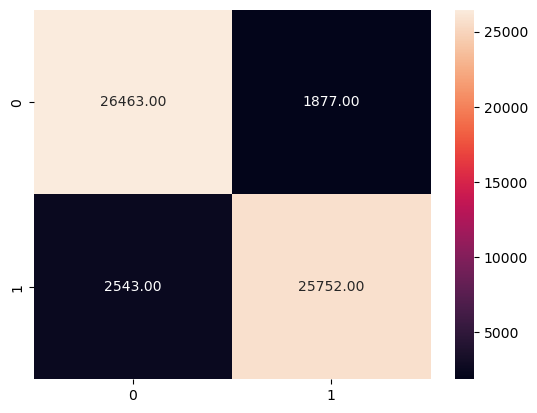

In [27]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

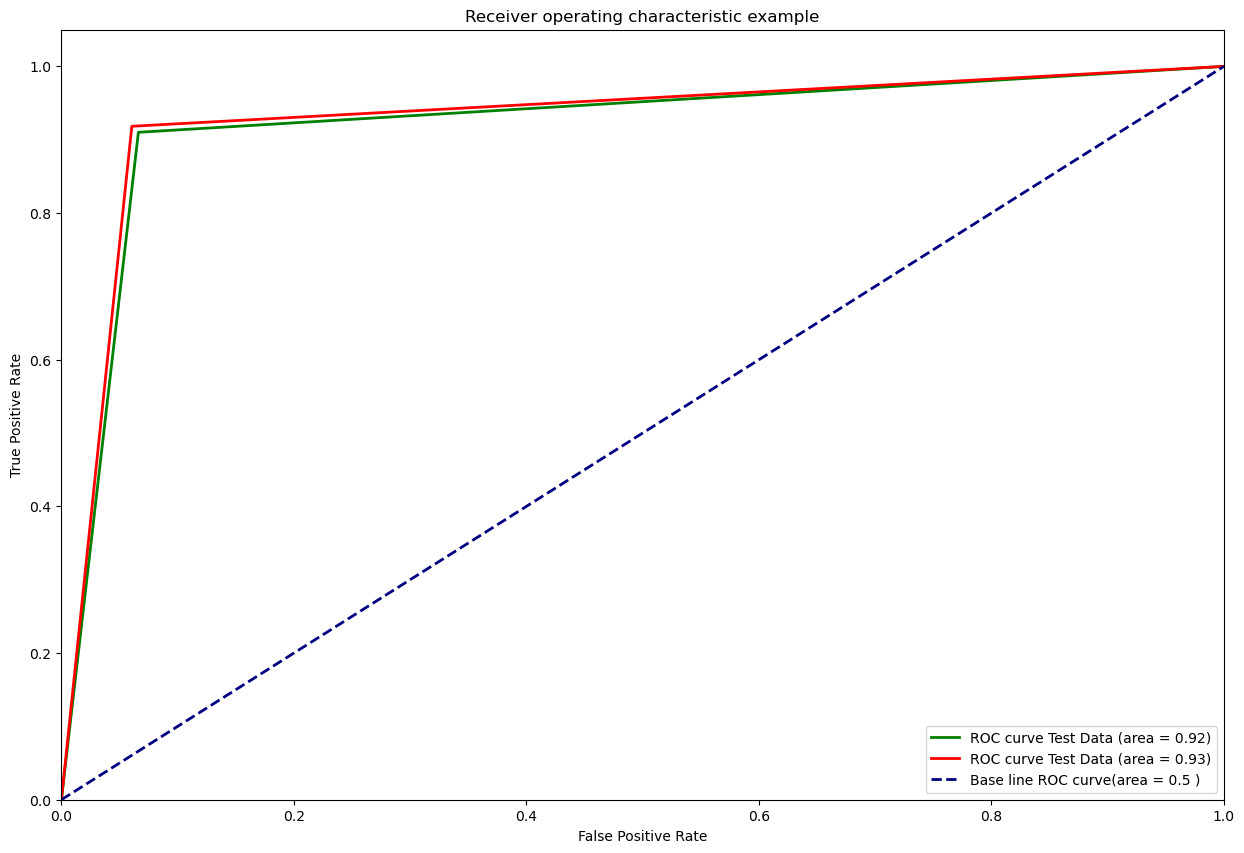

In [28]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,X_train,Y_train,X_test,y_test):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(X_test)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(y_test,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(X_train)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(Y_train,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(log,X_train,Y_train,X_test,y_test)

In [29]:
svc = LinearSVC()
svc.fit(X_train.toarray(), Y_train)

LinearSVC()

In [30]:
test_ds_predicted = svc.predict(X_test.toarray())

In [31]:
from sklearn import metrics 

print(metrics.classification_report(y_test, test_ds_predicted))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     28340
           1       0.94      0.92      0.93     28295

    accuracy                           0.93     56635
   macro avg       0.93      0.93      0.93     56635
weighted avg       0.93      0.93      0.93     56635



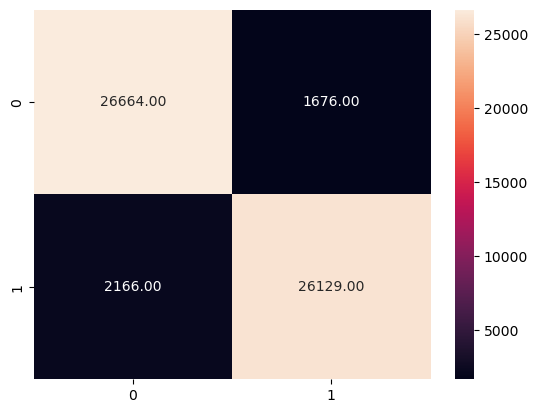

In [32]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_ds_predicted) 
sn.heatmap(cm, annot=True, fmt='.2f');

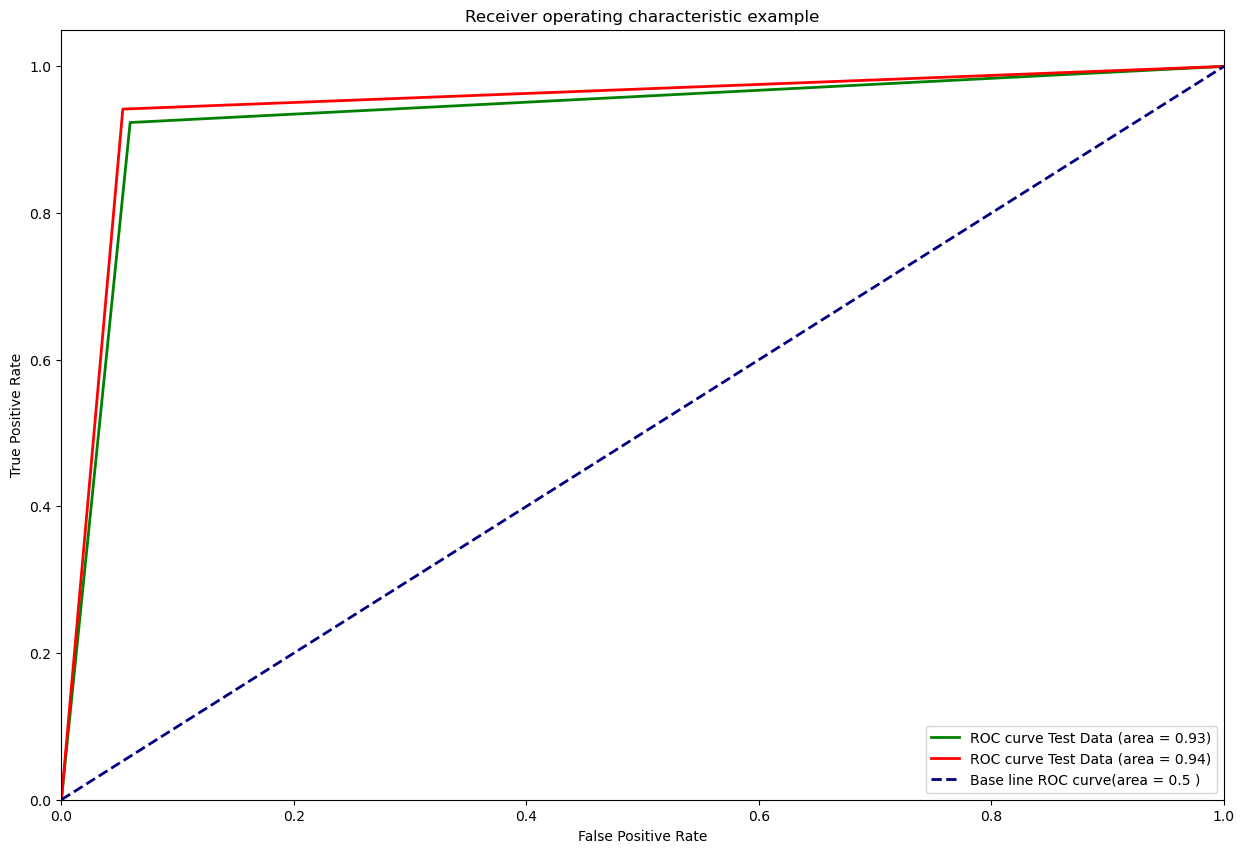

In [33]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,X_train,Y_train,X_test,y_test):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(X_test)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(y_test,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(X_train)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(Y_train,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(svc,X_train,Y_train,X_test,y_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
rfc.fit(X_train.toarray(), Y_train)

# Predict the target values for the testing set
predicted_y = rfc.predict(X_test)

In [35]:
from sklearn import metrics 

print(metrics.classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     28340
           1       0.98      0.95      0.96     28295

    accuracy                           0.96     56635
   macro avg       0.96      0.96      0.96     56635
weighted avg       0.96      0.96      0.96     56635



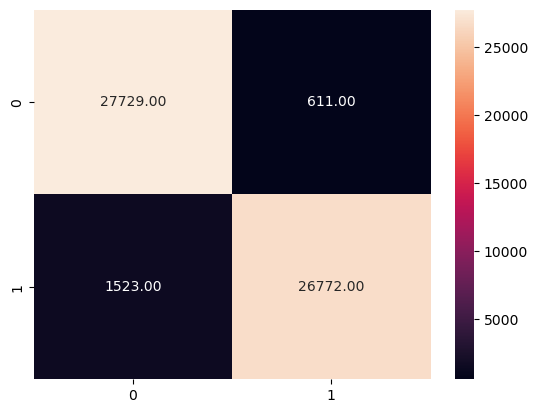

In [36]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predicted_y) 
sn.heatmap(cm, annot=True, fmt='.2f');

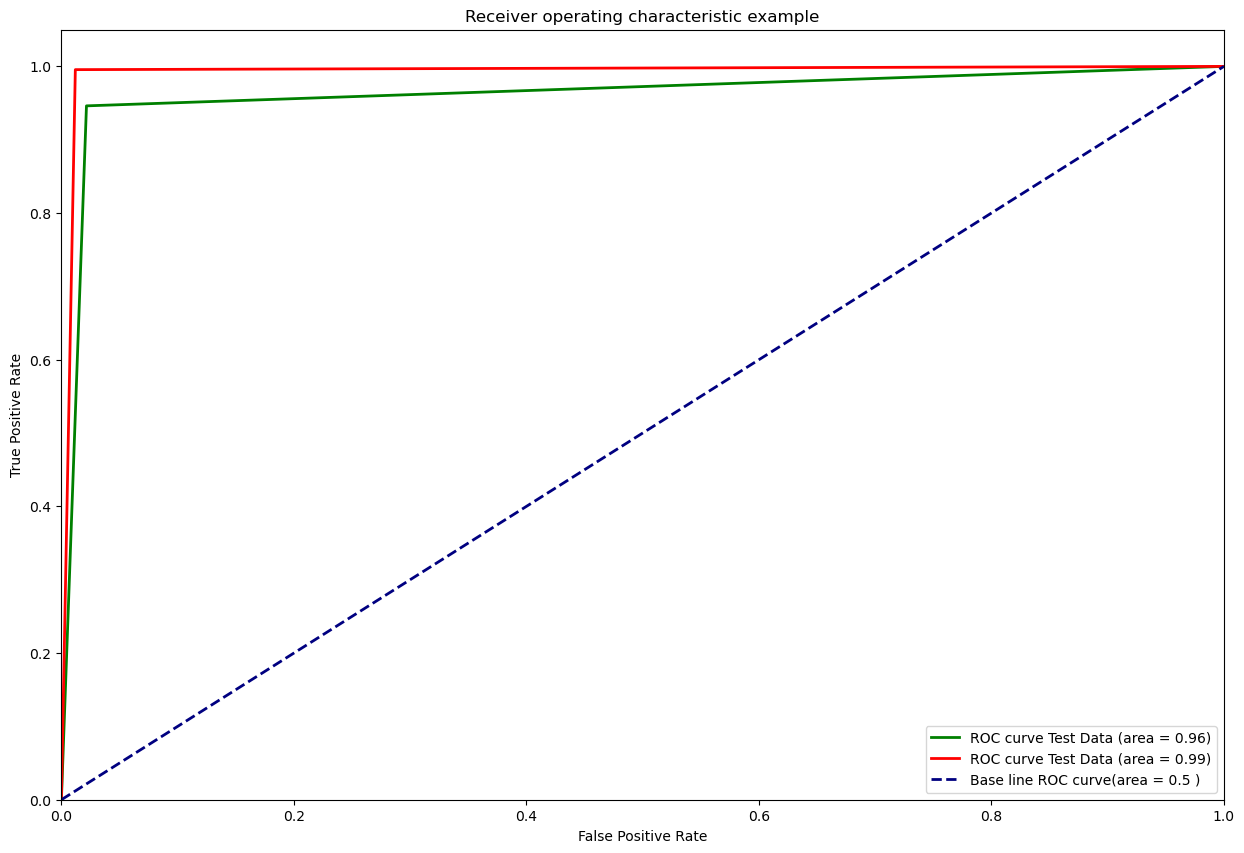

In [37]:
from sklearn.metrics import roc_curve,auc
def plot_roc(classifier,X_train,Y_train,X_test,y_test):
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    
    # TEST
    class_propbabilities = classifier.predict(X_test)
    y_probs = class_propbabilities[:]
    fpr["Test"],tpr["Test"],threshold = roc_curve(y_test,y_probs)
    roc_auc["Test"] = auc(fpr["Test"],tpr["Test"])
    
    #TRAIN
    class_propbabilities = classifier.predict(X_train)
    y_probs = class_propbabilities[:]
    fpr["Train"],tpr["Train"],threshold = roc_curve(Y_train,y_probs)
    roc_auc["Train"] = auc(fpr["Train"],tpr["Train"])
    
    plt.figure(figsize=(15, 10))
    linewidth = 2
    plt.plot( fpr["Test"],tpr["Test"], color="green",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Test"] )
    plt.plot( fpr["Train"],tpr["Train"], color="red",lw = linewidth,label='ROC curve Test Data (area = %0.2f)' % roc_auc["Train"] )
    plt.plot([0, 1], [0, 1],color="navy",lw = linewidth,linestyle = "--",label='Base line ROC curve(area = 0.5 )')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    
plot_roc(rfc,X_train,Y_train,X_test,y_test)

## MAKE PICKLE FILES OF MODEL

In [38]:
import joblib
joblib.dump( nb_clf, "BernoulliNB_Model_Gift_SMOTE.pkl" )
joblib.dump( nb_clf, "MultinomialNB_Model_Gift_SMOTE.pkl" )
joblib.dump( log, "LogisticRegression_Model_Gift_SMOTE.pkl" )
joblib.dump( svc, "LinearSVC_Model_Gift_SMOTE.pkl" )
joblib.dump( rfc, "RandomForestClassifier_Model_Gift_SMOTE.pkl" )

['RandomForestClassifier_Model_Gift_SMOTE.pkl']

## TESTING DATA 
1. : Check null values
2. : Apply TF-IDF on any row of TEST DATA
3. : Apply different models on data

In [39]:
test_ds = pd.read_csv("/kaggle/input/gift-cards-test-data/GiftCards_Preprocessed_TestData.csv")

In [40]:
test_ds

,Rating,ReviewText
0,1,perfect occasion extremely fast delivery thing note though made paper type substance like envelope mailer come also took step make tampering evident everything come wrapped plastic might want take...
1,1,sure review came thank displayed gave money could spend anywhere put spend website good little people use feel like bsing review done
2,0,buy birthday often recipient always excited get one shop want need vast selection product birthday design really cute small enough put birthday special way tell someone happy birthday
3,1,buy love many design many printed sentiment option add personal note variety dollar amount also physical form holiday used bunch prize family friend trivia game really cool prize tip parent best m...
4,1,birthday sister really appreciates lot since enjoys shopping way pick want made giving whole lot easier shipped quickly delivered time give birthday great thought bright happy birthday envelope ca...
...,...,...
1195,1,needed granddaughter could leave house due loved could order store
1196,1,bought know easy
1197,0,really much got day gave birthday
1198,1,balance someone look used


In [41]:
test_ds.isnull().sum()

Rating         0
ReviewText    60
dtype: int64

In [42]:
test_ds = test_ds.dropna()

## Loading pickle file of TF-IDF
1. Apply the tf-idf on any row data selected

In [43]:
import pickle
with open('/kaggle/working/tf_idf_obj.pkl', 'rb') as file:
    data = pickle.load(file)
    tf_idf_obj = data['tf_idf_obj']
    feature_names = data['feature_names']

# Transform the unseen data point using the loaded tf_idf_obj object
# Actual value = 1 
new_text_vectorized_1 = tf_idf_obj.transform([test_ds["ReviewText"][1]])

In [52]:
test_ds["Rating"][1]

1

In [44]:
test_ds["Rating"][215]

0

In [45]:
# Actual value = 0
new_text_vectorized_0 = tf_idf_obj.transform([test_ds["ReviewText"][215]])

## LOAD THE MODELS

In [46]:
import joblib

loaded_model1 = joblib.load("/kaggle/working/BernoulliNB_Model_Gift_SMOTE.pkl")
loaded_model2 = joblib.load("/kaggle/working/MultinomialNB_Model_Gift_SMOTE.pkl")
loaded_model3 = joblib.load("/kaggle/working/LinearSVC_Model_Gift_SMOTE.pkl")
loaded_model4 = joblib.load("/kaggle/working/LogisticRegression_Model_Gift_SMOTE.pkl")
loaded_model5 = joblib.load("/kaggle/working/RandomForestClassifier_Model_Gift_SMOTE.pkl")

## PREDICTION ON DATA

In [47]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
prediction1_1 = loaded_model1.predict(new_text_vectorized_1)
prediction2_1  = loaded_model2.predict(new_text_vectorized_1)
prediction3_1  = loaded_model3.predict(new_text_vectorized_1)
prediction4_1  = loaded_model4.predict(new_text_vectorized_1)
prediction5_1  = loaded_model5.predict(new_text_vectorized_1)

In [48]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
prediction1_0 = loaded_model1.predict(new_text_vectorized_0)
prediction2_0 = loaded_model2.predict(new_text_vectorized_0)
prediction3_0 = loaded_model3.predict(new_text_vectorized_0)
prediction4_0 = loaded_model4.predict(new_text_vectorized_0)
prediction5_0 = loaded_model5.predict(new_text_vectorized_0)

## OUTPUT OF PREDICTION GIVEN BY MODELS

In [49]:
# PREDICTED VALUE FOR ACTUAL VALUE 1 BY MODELS
print("Prediction value Bernoulli: ",prediction1_1)
print("Prediction value Multinomial: ",prediction2_1)
print("Prediction value LinearSVC: ",prediction3_1)
print("Prediction value Logistic Regression: ",prediction4_1)
print("Prediction value Random Forest: ",prediction5_1)

Prediction value Bernoulli:  [0]
Prediction value Multinomial:  [0]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [1]


In [50]:
# PREDICTED VALUE FOR ACTUAL VALUE 0 BY MODELS
print("Prediction value Bernoulli: ",prediction1_0)
print("Prediction value Multinomial: ",prediction2_0)
print("Prediction value LinearSVC: ",prediction3_0)
print("Prediction value Logistic Regression: ",prediction4_0)
print("Prediction value Random Forest: ",prediction5_0)

Prediction value Bernoulli:  [0]
Prediction value Multinomial:  [0]
Prediction value LinearSVC:  [1]
Prediction value Logistic Regression:  [1]
Prediction value Random Forest:  [0]


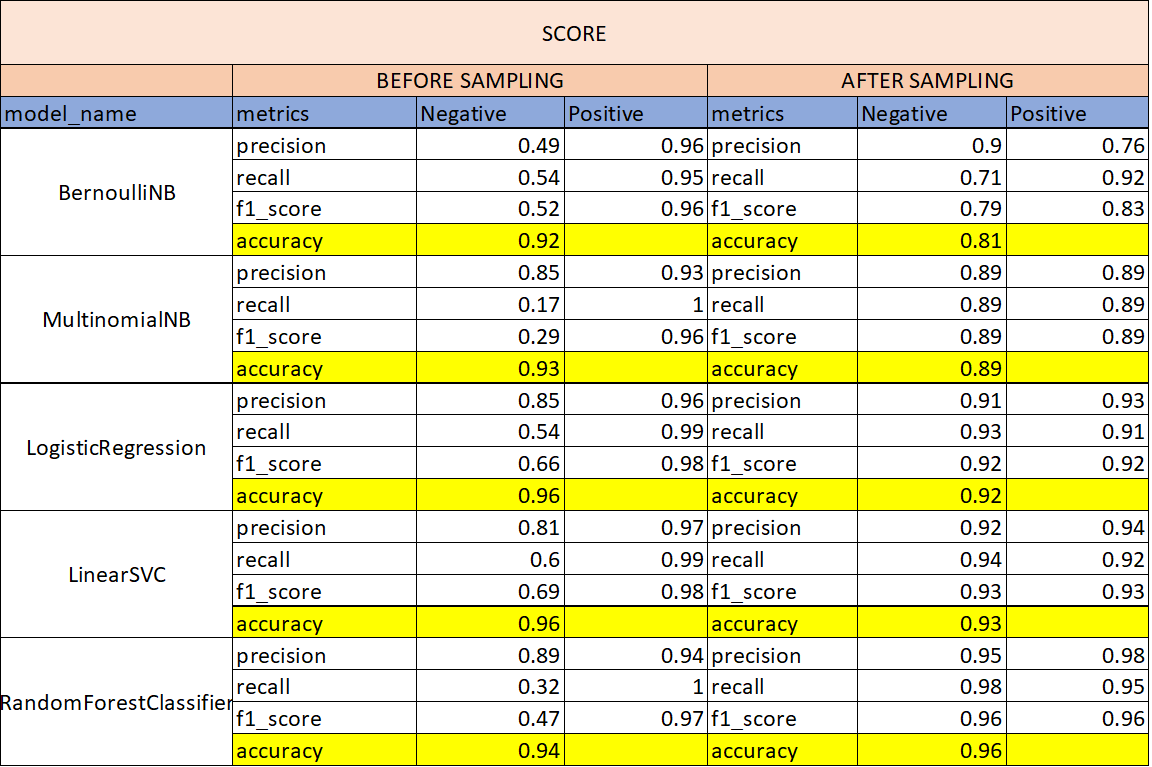

In [1]:
from IPython.display import Image
Image(filename='D:\Data Science CapStone Project\OUTPUT\SCORE_OUTPUT_GIFT.png')

# TOPIC MODEL

In [1]:
import numpy as np
import pandas as pd

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
stopwords = stopwords.words("english")

In [4]:
data = pd.read_csv('/kaggle/input/gift-card-preprocessed-data/Gift_Cards_Preprocessed_Data.csv')

In [5]:
spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [6]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [7]:
data.dropna(subset=['reviewText'], inplace=True)

In [8]:
lemmatized_texts = lemmatization(data['reviewText'])

In [9]:
lemmatized_texts[0]

'gift card gift really disappoint choice say sure alone want card reflect actual holiday celebrate principle send amazon gift card political correctness bad market decision lynn'

In [10]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (len(data_words))
print (data_words[0])

146674
['gift', 'card', 'gift', 'really', 'disappoint', 'choice', 'say', 'sure', 'alone', 'want', 'card', 'reflect', 'actual', 'holiday', 'celebrate', 'principle', 'send', 'amazon', 'gift', 'card', 'political', 'correctness', 'bad', 'market', 'decision', 'lynn']


In [11]:
# Build the bigram and trigram models
# higher threshold fewer phrases.
bigram = gensim.models.Phrases(data_words, min_count=2, threshold=50) 
trigram = gensim.models.Phrases(bigram[data_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['gift', 'card', 'gift', 'really', 'disappoint', 'choice', 'say', 'sure', 'alone', 'want', 'card', 'reflect', 'actual', 'holiday', 'celebrate', 'principle', 'send', 'amazon', 'gift', 'card', 'political', 'correctness', 'bad', 'market', 'decision', 'lynn']


In [12]:
def remove_stopwords(texts):
    return ([[word for word in simple_preprocess(str(doc)) 
              if word not in stopwords] for doc in texts])

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [13]:
data_words_nostops = remove_stopwords(data_words)
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_trigrams=make_trigrams(data_words_bigrams)

In [14]:
data_words_trigrams[0][:5]

['gift', 'card', 'gift', 'really', 'disappoint']

In [15]:
from gensim.models import TfidfModel

id2word=corpora.Dictionary(data_words_trigrams)
print('Words in dictionary: ', len(id2word))

#Save dictionary
id2word.save('id2word.dict')

id2word.filter_extremes(no_below = 4)
print('Post filter, Words in dictionary: ', len(id2word))

Words in dictionary:  21154
Post filter, Words in dictionary:  5853


In [16]:
texts=data_words_trigrams

corpus=[id2word.doc2bow(text) for text in texts]
print(corpus[0][0:20])

tfidf=TfidfModel(corpus,id2word=id2word)

low_value=0.05
words=[]
words_missing_in_tfidf=[]

for i in range(0, len(corpus)):
    bow=corpus[i]
    low_value_words=[]
    tfidf_ids=[id for id, value in tfidf[bow]]
    bow_ids=[id for id, value in bow]
    low_value_words=[id for id, value in tfidf[bow] if value< low_value]
    drops=low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf=[id for id in bow_ids if id not in tfidf_ids]
    
    new_bow=[b for b in bow if b[0] not in low_value_words and b[0] not in 
             words_missing_in_tfidf]
    corpus[i]=new_bow

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1)]


In [17]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('actual', 1),
  ('alone', 1),
  ('amazon', 1),
  ('bad', 1),
  ('card', 3),
  ('celebrate', 1),
  ('choice', 1),
  ('decision', 1),
  ('disappoint', 1),
  ('holiday', 1),
  ('market', 1),
  ('political', 1),
  ('really', 1),
  ('reflect', 1),
  ('say', 1),
  ('send', 1),
  ('sure', 1),
  ('want', 1)]]

In [18]:
## Check for optimum number of topics based on coherence scrore

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=500,
                                           passes=30,
                                           alpha="auto")
        #model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, 
        #                                         id2word=id2word)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, 
                                        dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [19]:
import gc
gc.collect()

0

In [20]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=data_words_trigrams, 
                                                        start=2, limit=10, step=1)

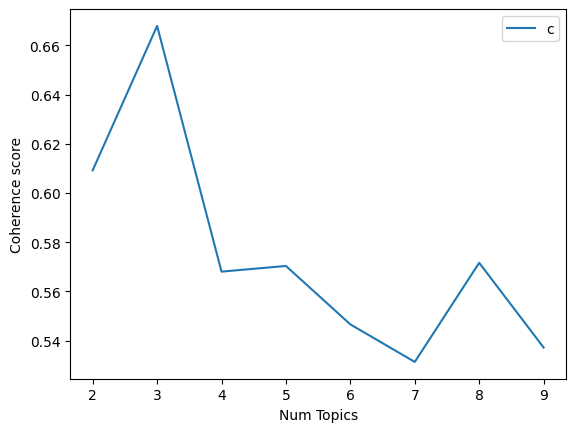

In [21]:
## Graph to choose the number of topics
import matplotlib.pyplot as plt

# Show graph
limit=10; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [22]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6093
Num Topics = 3  has Coherence Value of 0.668
Num Topics = 4  has Coherence Value of 0.5681
Num Topics = 5  has Coherence Value of 0.5703
Num Topics = 6  has Coherence Value of 0.5466
Num Topics = 7  has Coherence Value of 0.5313
Num Topics = 8  has Coherence Value of 0.5716
Num Topics = 9  has Coherence Value of 0.5372


In [23]:
# Select the model and print the topics
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.102*"easy" + 0.058*"perfect" + 0.043*"make" + 0.039*"cute" + 0.037*"nice" + 0.028*"come" + 0.028*"thank" + 0.027*"fast" + 0.026*"print" + 0.021*"quick"'), (1, '0.110*"card" + 0.048*"great" + 0.041*"love" + 0.032*"use" + 0.030*"get" + 0.024*"give" + 0.023*"buy" + 0.021*"work" + 0.020*"good" + 0.017*"purchase"'), (2, '0.016*"money" + 0.014*"take" + 0.013*"try" + 0.010*"issue" + 0.010*"pay" + 0.009*"even" + 0.009*"call" + 0.009*"order" + 0.008*"tell" + 0.008*"see"')]


In [24]:
import pyLDAvis
import pyLDAvis.gensim as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(optimal_model, corpus, id2word, mds="mmds", R=30)
vis

/opt/conda/lib/python3.10/site-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_max

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.134974  0.345585       1        1  60.613925
0      0.225655 -0.318227       2        1  19.868912
2     -0.360630 -0.027359       3        1  19.517164, topic_info=         Term          Freq         Total Category  logprob  loglift
4        card  70299.000000  70299.000000  Default  30.0000  30.0000
35       easy  21377.000000  21377.000000  Default  29.0000  29.0000
169   perfect  12113.000000  12113.000000  Default  28.0000  28.0000
22      great  30914.000000  30914.000000  Default  27.0000  27.0000
46       make   8930.000000   8930.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
3092      eat   1095.030079   1096.899639   Topic3  -5.2356   1.6322
222      even   1926.311147   2543.932680   Topic3  -4.6708   1.3558
109     never   1460.703547   3280.936157   Topic3  -4.9474   0.8247
125     order   1815.233887   7482.526613   Topic3  -4.7301   0.2175
14        say   1131.925954   6982.717978   Topic3  -5.2024  -0.1856

[133 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
139       1  0.999869     able
338       3  0.999474   accept
270       3  0.998971  account
199       2  0.999082      add
199       3  0.000650      add
...     ...       ...      ...
317       1  0.999964      way
262       3  0.999032  website
318       1  0.999863     well
319       1  0.999960     work
386       3  0.999284    worth

[122 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])